In [ ]:
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")
base_path = './drive/MyDrive/Colab Notebooks/Data/ML/HW4/languageID/'

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from numpy import log as ln
import pandas as pd
from sklearn.metrics import confusion_matrix
import math





# Naive Bayes

In [ ]:

def load_training_data(directory, training_label_count = 10):
  files = os.listdir(directory)
  train_data_set = []
  for f in files:
    if int(f.split('.')[0][1:]) < training_label_count:
      bow = create_bow(directory + f)
      train_data_set.append({'label' : f[0] , 'bow' : bow })

  return train_data_set


In [ ]:
dataset = load_training_data(base_path)

In [ ]:
dataset

In [ ]:
def create_bow(filepath):
  bow = [0] * 27
  with open(filepath, 'r') as f:
    lines = f.readlines()
    for line in lines:
      word = line
      chars = list(word)
      for char in chars:
        if char != '\n':
          if(ord(char)) == 32:
            bow[-1] += 1
          else:
            bow[ord(char)-97] += 1
                
  return bow  

In [ ]:
def prior(training_data, label_list):
    """ return the prior probability of the label in the training set
    """

    smooth = 0.5 # smoothing factor
    priorprob = {}
    total_files = len(training_data)
    label_files = {} #count for each label
    for label in label_list:
      label_files[label] = 0
      priorprob[label] = 0
    
    for data in training_data:
      label_files[data['label']] += 1

    for label in priorprob:
      priorprob[label] = (label_files[label] + smooth)/(total_files + smooth * len(label_list))

    return priorprob

In [ ]:
prior = prior(dataset, ['e', 'j', 's'])
prior

{'e': 0.3333333333333333, 'j': 0.3333333333333333, 's': 0.3333333333333333}

In [ ]:
def p_char_given_label(training_data, label):
  """ return the class conditional probability vector of label over all chars, with smoothing """

  smooth = 0.5 # smoothing factor
  char_prob = [0] * 27

  #count total chars per label including space
  total_chars_per_label = 0
  for files in training_data:
    if files['label'] == label:
      total_chars_per_label += sum(files['bow'])

  #for all characters in character set
  for c in range(27):
    count_per_label = 0
    for files in training_data:
      if files['label'] == label:
        count_per_label += files['bow'][c]
      
    char_prob[c] =  (count_per_label + smooth) / (total_chars_per_label + smooth * 27) 

  return char_prob

In [ ]:
char_prob = {'s': p_char_given_label(dataset, 's'),
              'e': p_char_given_label(dataset, 'e'),
              'j': p_char_given_label(dataset, 'j') }

char_prob

In [ ]:
test_bow = create_bow(filepath= base_path + 'e10.txt')
test_bow

In [ ]:
def get_p_x_y(test_bow, char_prob):
  p_x_y = 0
  for i in range(len(test_bow)):
    p_x_y += test_bow[i] * ln(char_prob[i])
  return p_x_y


In [ ]:
p_x_y = {'e': get_p_x_y(test_bow, char_prob['e']),
          'j': get_p_x_y(test_bow, char_prob['j']),
          's': get_p_x_y(test_bow, char_prob['s'])}

# char_prob_e

In [ ]:
p_x_y

{'e': -7841.865447060635, 'j': -8771.433079075032, 's': -8467.282044010557}

In [ ]:
def classify(p_x_y, prior):
  posterior = dict.fromkeys(prior, 0)

  for label in prior:
    posterior[label] = p_x_y[label] + ln(prior[label])

  print(posterior)

  return max(posterior.items(), key = lambda k : k[1])[0]

In [ ]:
classify(p_x_y, prior)

{'e': -7842.964059349303, 'j': -8772.5316913637, 's': -8468.380656299225}


'e'

In [ ]:
#Test on all files from 10.txt to 19.txt

y_true = []
y_pred = []

files = os.listdir(base_path)
for f in files:
  if int(f.split('.')[0][1:]) >= 10:
    test_bow = create_bow(base_path + f)
    y_true.append(f[0])

    p_x_y = {'e': get_p_x_y(test_bow, char_prob['e']),
          'j': get_p_x_y(test_bow, char_prob['j']),
          's': get_p_x_y(test_bow, char_prob['s'])}

    
    y_pred.append(classify(p_x_y, prior))








{'e': -4599.349605534324, 'j': -5079.4882017602695, 's': -4865.272074018617}
{'e': -4684.1379270533025, 'j': -5182.575715091949, 's': -5048.823878903409}
{'e': -4743.852115829975, 'j': -5183.231961072002, 's': -5179.762032865238}
{'e': -6880.853983590577, 'j': -7610.86481136972, 's': -7356.973075930628}
{'e': -1656.9553541936987, 'j': -1818.3565442184502, 's': -1736.697003246394}
{'e': -7679.948367379369, 'j': -8632.830881322532, 's': -8290.375532297925}
{'e': -9347.310487347908, 'j': -10408.382445479408, 's': -10057.350726185592}
{'e': -7842.964059349303, 'j': -8772.5316913637, 's': -8468.380656299225}
{'e': -4601.337546825696, 'j': -5035.050435035467, 's': -4961.611794816845}
{'e': -5286.589067292361, 'j': -5837.4614104480725, 's': -5682.192323138697}
{'e': -4806.891638181592, 'j': -4368.89042253691, 's': -5256.873411735181}
{'e': -4827.639396231296, 'j': -4336.765401209866, 's': -5296.614149031251}
{'e': -4439.149033750644, 'j': -3993.345452486159, 's': -4848.961801618616}
{'e': -38

In [ ]:
confusion_matrix(y_true, y_pred, labels=['e','j','s'])

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

# Numpy Implementation

In [ ]:
import torch

In [ ]:
mnist_train_path = './drive/MyDrive/Colab Notebooks/Data/ML/HW4/mnist_train.csv'
mnist_test_path = './drive/MyDrive/Colab Notebooks/Data/ML/HW4/mnist_test.csv'

train_data = np.loadtxt(mnist_train_path, 
                        delimiter=",")
test_data = np.loadtxt(mnist_test_path, 
                       delimiter=",") 

train_data = train_data[:10000]
test_data = test_data[:2000]

In [ ]:


class Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.uniform( low = (-1/math.sqrt(784)) , high = 1/math.sqrt(784), size = (n_inputs, n_neurons))
        # self.weights = np.zeros((n_inputs, n_neurons))
        # self.weights = np.random.uniform(-1,1, size = (n_inputs, n_neurons) )
        # self.biases = np.random.uniform(0,1, size=(1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights)


class Activation_Sigmoid:
    def forward(self, inputs):
        self.output = 1.0/(1 + np.exp(-inputs))

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs)
        probabilities = exp_values / np.sum(exp_values)
        self.output = probabilities


X , y = train_data[:, 1:] , train_data[:, 0]
# X = np.append(X,np.ones([len(X), 1]), axis = 1) #for bias




In [ ]:
h_layer = Layer(len(X[0]),300)
activation1 = Activation_Sigmoid()

o_layer = Layer(300, 10)
activation2 = Activation_Softmax()

alpha = 0.01
# print(h_layer.weights.shape)
wrong = 0
x = range(50)
y_loss = []
for j in range(50) :
  log_loss = []
  for i in range(len(X)):

    #Forward prop
    h_layer.forward(X[i])
    Z1 = h_layer.output
    activation1.forward(h_layer.output)
    A1 = activation1.output

    o_layer.forward(activation1.output)
    Z2 = o_layer.output
    activation2.forward(o_layer.output)
    A2 = activation2.output

    #Backward Prop 

    y_one_hot = [0] * 10
    y_one_hot[int(y[i])] = 1

    dZ2= A2 - y_one_hot
    dW2 = np.zeros_like(o_layer.weights)
    dW2 = A1.reshape((-1, 1)).dot(dZ2.reshape((-1, 1)).T)
    # dB2 = np.sum(dZ2)
    
    dW1 = np.zeros_like(h_layer.weights)
    dZ1 = o_layer.weights.dot(dZ2.reshape(-1,1))* np.matmul(activation1.output ,( 1 - activation1.output))
    dW1 = X[i].reshape(-1,1).dot(dZ1.T)
    # dB1 = np.sum(dZ1)
    # print(dW1.shape)
    # break


    #update parameters 
    o_layer.weights -= alpha * dW2
    # o_layer.biases -= alpha * dB2
    h_layer.weights -= alpha * dW1
    # h_layer.biases -= alpha * dB1
    y_pred = np.argmax(A2, 0)

    if y_pred != y[i]:
      wrong += 1

    if i % 100 == 0:
      print('Wrong: ' + str(wrong))
      wrong = 0

    log_loss.append(-np.log(A2[int(y[i])]))
  y_loss.append(np.mean(log_loss))
  log_loss = []


Text(0, 0.5, 'Loss')

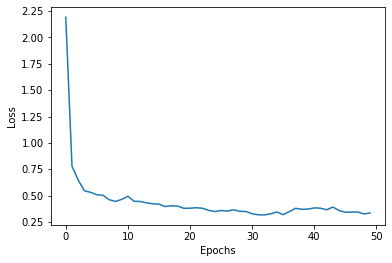

In [ ]:
import matplotlib.pyplot as plt 
x = range(len(y_loss))
plt.plot(x,y_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
# len(test_data)
X_t , y_t = test_data[:, 1:] , test_data[:, 0]
true_pred = 0
print(len(X_t))
for i in range(len(X_t)):
    #Forward prop
    h_layer.forward(X_t[i])
    Z1 = h_layer.output
    activation1.forward(h_layer.output)
    A1 = activation1.output

    o_layer.forward(activation1.output)
    Z2 = o_layer.output
    activation2.forward(o_layer.output)
    A2 = activation2.output

    y_pred = np.argmax(A2, 0)
    # print('Pred :' + str(y_pred))
    # print('Truth :' + str(y[i]))
    # break
    if y_pred == y_t[i]:
      true_pred += 1

print(true_pred/len(y_t))

2000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


0.8525


# Pytorch Implementation

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import itertools
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=32, shuffle=False)

In [ ]:
for data in trainset:
    print(data)
    break

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 300, bias=False)
        self.fc2 = nn.Linear(300, 10, bias=False)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [ ]:
net = Net()
net.fc1.weight.data.fill_(0)
net.fc2.weight.data.fill_(0)
optimizer = optim.SGD(net.parameters(), lr=0.01)
x = range(100)
y_loss = [] #loss
# 
epoch_loss = []
for epoch in range(50): 
  print("Epoch :" + str(epoch))
  for data in itertools.islice(trainset, 10000):  
    X, y = data  
    net.zero_grad()
    output = net(X.view(-1,784))  
    # print(output)
    # print(y)
    # break
    loss = F.nll_loss(output, y)  
    loss.backward()  
    optimizer.step() 
    y_loss.append(loss.item())
  epoch_loss.append(np.mean(y_loss))
  y_loss = []
  print("Loss :" + str(epoch_loss[-1]))

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

In [ ]:
x = range(0,len(epoch_loss) )
epoch_loss_t = epoch_loss
plt.plot(x,epoch_loss_t)
plt.xlabel("Epochs")
plt.ylabel("Loss")